In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train_data = pd.read_csv('../data/raw/mnist_train.csv')
test_data = pd.read_csv('../data/raw/mnist_test.csv')

In [3]:
#Explore Dataset
print("🔍 Training Data Shape:", train_data.shape)
print("🔍 Test Data Shape:", test_data.shape)

🔍 Training Data Shape: (60000, 785)
🔍 Test Data Shape: (10000, 785)


In [4]:
#Check for Null/Missing Values
print("\nMissing values in training data:\n", train_data.isnull().sum().sum())
print("Missing values in test data:\n", test_data.isnull().sum().sum())


Missing values in training data:
 0
Missing values in test data:
 0


In [5]:
#Show Sample Data
print("\n📝 First 5 rows of training data:")
print(train_data.head())


📝 First 5 rows of training data:
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


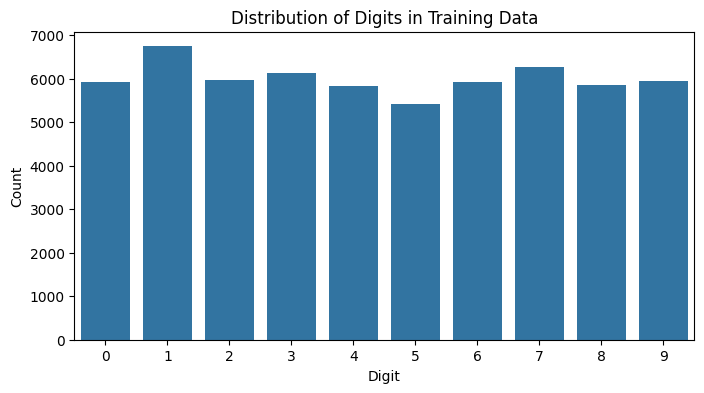

In [6]:
#Plot Class Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Digits in Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.savefig('../reports/class_distribution.png')
plt.show()

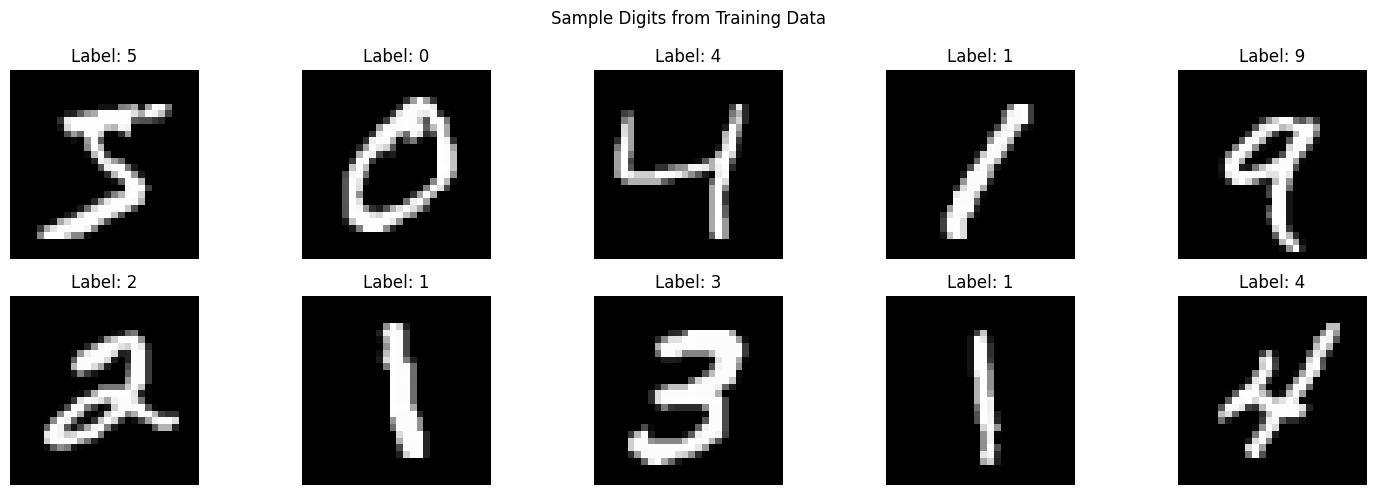

In [7]:
#Visualize Some Digits
def plot_digits(data, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        image = np.array(data.iloc[i, 1:]).reshape(28, 28)
        label = data.iloc[i, 0]
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.suptitle("Sample Digits from Training Data")
    plt.savefig('../reports/sample_digits.png')
    plt.tight_layout()
    plt.show()

plot_digits(train_data)

In [8]:
# Pixel Value Statistics
pixel_data = train_data.iloc[:, 1:]
print("\n📊 Pixel Value Summary:")
print(pixel_data.describe())


📊 Pixel Value Summary:
           1x1      1x2      1x3      1x4      1x5      1x6      1x7      1x8  \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           1x9     1x10  ...         28x19         28x20         28x21  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.200433      0.088867      0.045633   
std        0.0      0.0 

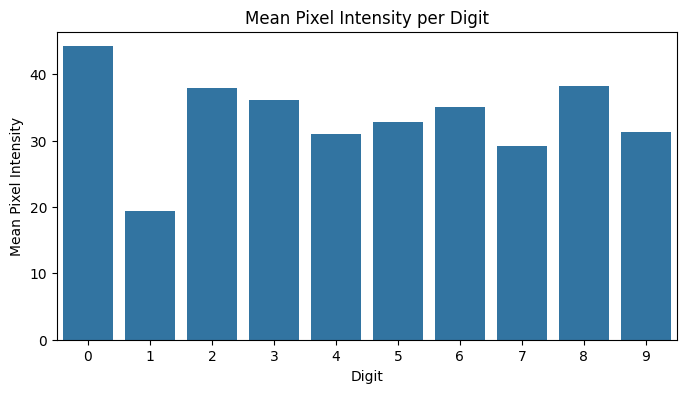

In [9]:
# Get only pixel columns (drop the label)
pixel_columns = train_data.columns[1:]

# Group by 'label' and calculate mean pixel intensity
mean_intensity = train_data.groupby('label')[pixel_columns].mean().mean(axis=1)

plt.figure(figsize=(8, 4))
sns.barplot(x=mean_intensity.index, y=mean_intensity.values)
plt.title('Mean Pixel Intensity per Digit')
plt.xlabel('Digit')
plt.ylabel('Mean Pixel Intensity')
plt.savefig('../reports/mean_pixel_intensity.png')
plt.show()


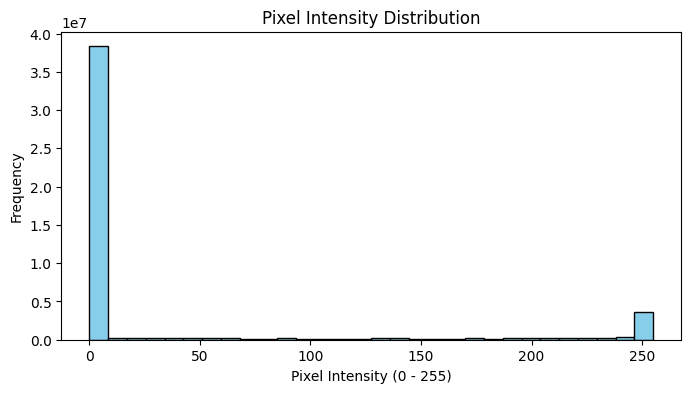

✅ EDA Completed.


In [ ]:
# Flatten all pixel values into a single list
all_pixels = train_data[pixel_columns].values.flatten()

plt.figure(figsize=(8, 4))
plt.hist(all_pixels, bins=30, color='skyblue', edgecolor='black')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity (0 - 255)')
plt.ylabel('Frequency')
plt.savefig('../reports/pixel_intensity_distribution.png')
plt.show()

print("✅ EDA Completed.")